In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://github.com/jesugome/InfluencersInSocialNetworks/raw/master/logoAnalytics.png")

<h2><center>
# Influencers in Social Networks
</center></h2> <h4><center>
# Machine Learning Project
</center></h4>
Developed by [Jesus Solano](http://www.jesussolano.com/) -- [Sergio Castelblanco](http://www.jesussolano.com/) -- [Jose Sandoval](http://www.jesussolano.com/) -- [Aleksey Sepulveda](http://www.jesussolano.com/)


version 7.3, June 24 2018


<h1> <center> Problem Description </h1> </center> 

In [28]:
Esta competencia, patrocinada por el Data Science London y el Windows Azure Users Group de Inglaterra, en asociación con Microsoft 
y Peerindex, tiene como objetivo el entrenar un modelo de aprendizaje automático que prediga con alta precisión el juicio humano 
respecto a quién es más influyente en las redes sociales, específicamente en Twitter.

El conjunto de datos, proporcionado por Peerindex, comprende una serie de variables que miden la actividad en esta red social para 
individuos por pares identificados como sujeto A y sujeto B. En este sentido, las variables explicativas corresponden a medidas por 
pares (A y B) siendo estas 11 funciones numéricas precalculadas y no negativas, basadas en la actividad de Twitter. Dentro de las 
variables explicativas se cuenta, entre otras: 

            •	follower_count: Cantidad de seguidores
            •	following_count: Cantidad de individuos seguidos
            •	retweets_received: Cantidad de retweets recibidos
            •	retweets_sent: Cantidad de retweets realizados
            •	mentions_received: Cantidad de menciones recibidas
            •	mentions_sent: Cantidad de menciones realizadas

En cuanto a la variable explicada, se tiene la etiqueta binaria que representa un juicio humano sobre cuál de los dos individuos, 
A o B, es más influyente. Una etiqueta '1' significa que A es más influyente que B. 0 significa que B es más influyente que A. 

Teniendo en cuenta estas características, se tiene un problema de clasificación que se enfrentará a través de modelos de machine learning que van desde KNN y regresión logística, hasta modelos de ensamble y Stacking, pasando por arboles de clasificación, Support Vector Machine, entre otros.
Al final obtenemos una batería de modelos con un gran performance,  medido a través del área bajo la curva  AUC, entre otras métricas.


## Importing Data

In [6]:
import pandas as pd
data = pd.read_csv("https://github.com/jesugome/InfluencersInSocialNetworks/raw/master/datasets/train.csv",sep=",")
data.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


<h1> <center> Exploratory Analysis </h1> </center> 

We develop a preliminar analysis in order to indentify: 
* Univariable analysis.
* Multicoliniarity.
* Variable correlations.
* Balance Data Analysis.
* Probability density plots.
* Outliers.

In [7]:
# Import the neccesary libraries and set a seed. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings("ignore")
%matplotlib inline
from PIL import Image

np.random.seed(22)

### Describing dataset

In [8]:
print ("-----------------------------------") 
print ("Data shape :",data.shape,"\n")
print ("-----------------------------------")
print ("-----------------------------------")
print ("data info  :",data.info())
print ("-----------------------------------")

-----------------------------------
Data shape : (5500, 23) 

-----------------------------------
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
Choice                 5500 non-null int64
A_follower_count       5500 non-null int64
A_following_count      5500 non-null int64
A_listed_count         5500 non-null int64
A_mentions_received    5500 non-null float64
A_retweets_received    5500 non-null float64
A_mentions_sent        5500 non-null float64
A_retweets_sent        5500 non-null float64
A_posts                5500 non-null float64
A_network_feature_1    5500 non-null int64
A_network_feature_2    5500 non-null float64
A_network_feature_3    5500 non-null float64
B_follower_count       5500 non-null int64
B_following_count      5500 non-null int64
B_listed_count         5500 non-null int64
B_mentions_received    5500 non-null float64
B_retweets_received    5500 non-null float64
B_mentions

In [9]:
# Statistical description of each variable. 

round(data.describe())

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,...,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0
mean,1.0,649884.0,12659.0,5952.0,2666.0,1032.0,6.0,1.0,9.0,5268.0,...,12738.0,5903.0,2555.0,997.0,6.0,1.0,10.0,5255.0,85.0,3745.0
std,0.0,2028787.0,49009.0,17339.0,29165.0,10955.0,10.0,2.0,18.0,28947.0,...,50055.0,16298.0,25089.0,9342.0,10.0,2.0,19.0,26779.0,107.0,5518.0
min,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,2664.0,322.0,85.0,3.0,1.0,0.0,0.0,1.0,12.0,...,322.0,75.0,3.0,1.0,0.0,0.0,1.0,11.0,15.0,1206.0
50%,1.0,45589.0,778.0,932.0,49.0,14.0,2.0,0.0,4.0,195.0,...,773.0,890.0,49.0,14.0,2.0,0.0,3.0,190.0,55.0,2206.0
75%,1.0,392738.0,2838.0,6734.0,350.0,119.0,7.0,1.0,11.0,1323.0,...,2838.0,6734.0,374.0,107.0,7.0,1.0,11.0,1323.0,112.0,4350.0
max,1.0,36543194.0,1165830.0,549144.0,1145219.0,435826.0,77.0,16.0,193.0,920838.0,...,664324.0,549144.0,1145219.0,435826.0,77.0,16.0,193.0,920838.0,1862.0,75526.0


### Finding missing values in dataset

In [12]:
print ("-----------------------------------")
print ("\n Missing values per variable: \n ",data.isnull().sum())
print ("-----------------------------------")

-----------------------------------

 Missing values per variable: 
  Choice                 0
A_follower_count       0
A_following_count      0
A_listed_count         0
A_mentions_received    0
A_retweets_received    0
A_mentions_sent        0
A_retweets_sent        0
A_posts                0
A_network_feature_1    0
A_network_feature_2    0
A_network_feature_3    0
B_follower_count       0
B_following_count      0
B_listed_count         0
B_mentions_received    0
B_retweets_received    0
B_mentions_sent        0
B_retweets_sent        0
B_posts                0
B_network_feature_1    0
B_network_feature_2    0
B_network_feature_3    0
dtype: int64
-----------------------------------


             ***************************************
                       Missing Value Map
             ***************************************


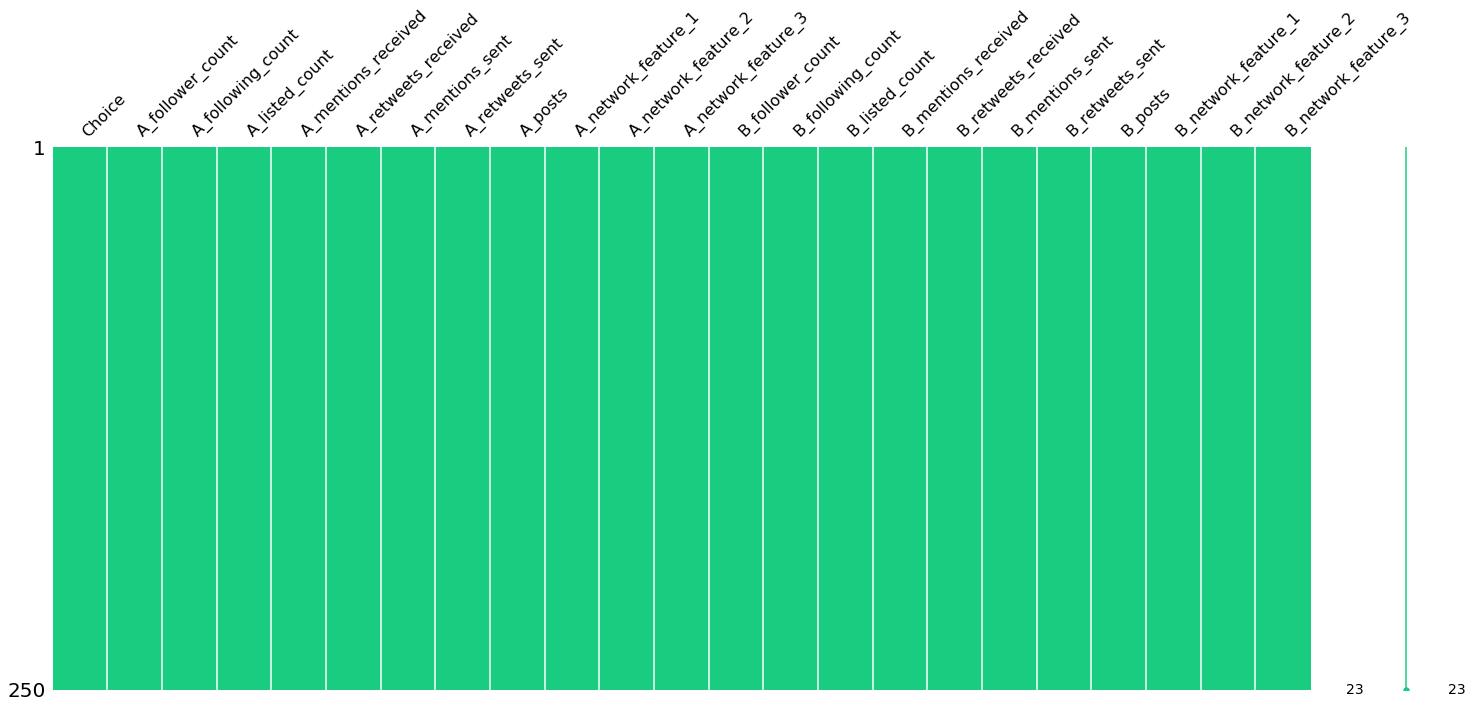

In [6]:
import missingno as msno
%matplotlib inline
print ("             ***************************************")
print ("                       Missing Value Map")
print ("             ***************************************")
msno.matrix(data.sample(250),color=(0.1, 0.8, 0.5))

Last results tell us we don't need a data imputation over the train data set. There are no missing values and all the variables has complete information. 

### Correlation between variables

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'CORRELATION BETWEEN VARIABLES')

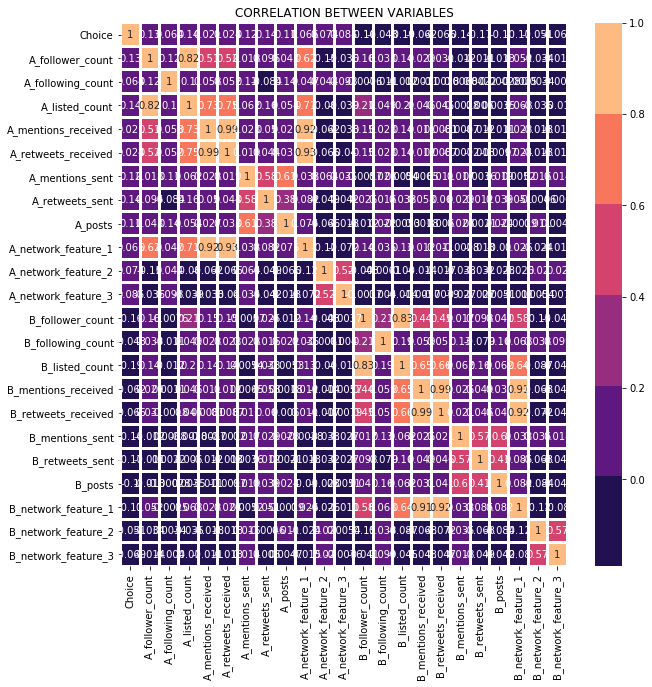

In [7]:
%pylab inline
pylab.rcParams['figure.figsize'] = (30, 60)
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap=sns.color_palette("magma"),linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")


The correlation map show high correlation between the mentions and retweets of each individual (I.E 'A_mentions_recieved' with 'A_retweets recieved'). Nevertheless, those variables are retained in the dataset becuase the influence of an individual could be by their mentions or retweets.

### Balance data analysis

Text(0.5,1,'Proportion of target variable in dataset')

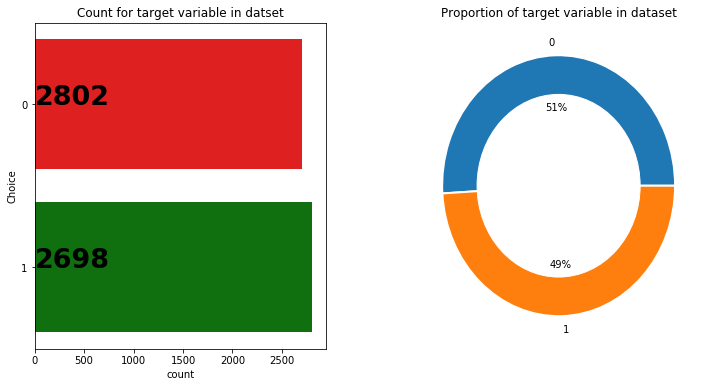

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.countplot(y = data["Choice"],palette=["r","g"])
for i,j in enumerate(data["Choice"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize = 27)
plt.title("Count for target variable in datset")


plt.subplot(122)
plt.pie(data["Choice"].value_counts().values,labels=["0","1"],autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .3)
plt.title("Proportion of target variable in dataset")

### Variable Comparison
Statistical comparison of mean and standard deviation values over training features.

_________________________________________________
 This plot shows the mean and standard deviation of attributes 
 for target classes to discover the varialbes which need to be normalized.
_________________________________________________
             [GREEN == 1 , RED == 0]
 1 -> Person A is more influencer than person B.
 0 -> Person B is more influencer than person A.
_________________________________________________


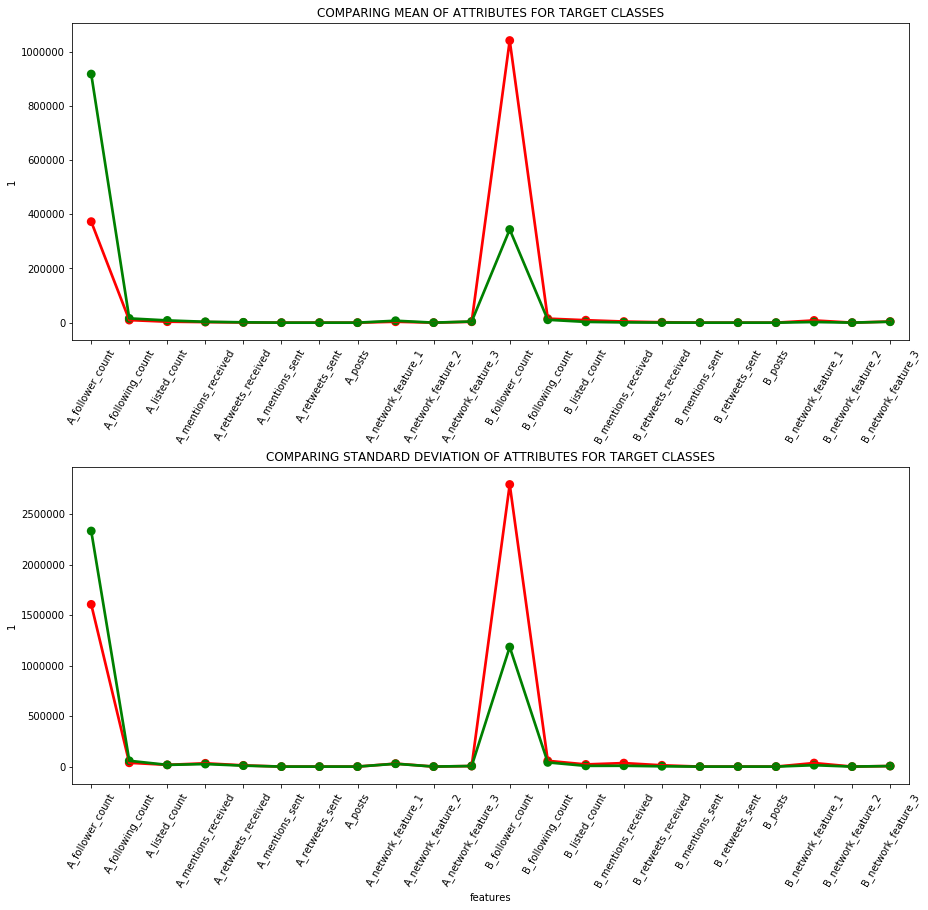

In [9]:
compare = data.groupby("Choice")[['A_follower_count', 'A_following_count', 'A_listed_count', 'A_mentions_received',
                                        'A_retweets_received', 'A_mentions_sent', 'A_retweets_sent',
                                        'A_posts','A_network_feature_1','A_network_feature_2','A_network_feature_3','B_follower_count','B_following_count','B_listed_count','B_mentions_received','B_retweets_received','B_mentions_sent','B_retweets_sent','B_posts','B_network_feature_1','B_network_feature_2','B_network_feature_3']].mean().reset_index()


compare = compare.drop("Choice",axis =1)

compare1 = data.groupby("Choice")[['A_follower_count', 'A_following_count', 'A_listed_count', 'A_mentions_received',
                                        'A_retweets_received', 'A_mentions_sent', 'A_retweets_sent',
                                        'A_posts','A_network_feature_1','A_network_feature_2','A_network_feature_3','B_follower_count','B_following_count','B_listed_count','B_mentions_received','B_retweets_received','B_mentions_sent','B_retweets_sent','B_posts','B_network_feature_1','B_network_feature_2','B_network_feature_3']].std().reset_index()
compare1 = compare1.drop("Choice",axis=1)

compare_mean = compare.transpose().reset_index()
compare_mean = compare_mean.rename(columns={'index':"features", 0:"0", 1:"1"})
plt.figure(figsize=(15,14))
plt.subplot(211)
sns.pointplot(x= "features",y="0",data=compare_mean,color="r")
sns.pointplot(x= "features",y="1",data=compare_mean,color="g")
plt.xticks(rotation =60)
plt.xlabel("")
plt.title("COMPARING MEAN OF ATTRIBUTES FOR TARGET CLASSES")

compare_std = compare1.transpose().reset_index()
compare_std = compare_std.rename(columns={'index':"features", 0:"0", 1:"1"})
plt.subplot(212)
sns.pointplot(x= "features",y="0",data=compare_std,color="r")
sns.pointplot(x= "features",y="1",data=compare_std,color="g")
plt.xticks(rotation =60)
plt.title("COMPARING STANDARD DEVIATION OF ATTRIBUTES FOR TARGET CLASSES")
plt.subplots_adjust(hspace =.4)

print ("_________________________________________________")
print (" This plot shows the mean and standard deviation of attributes \n for target classes to discover the varialbes which need to be normalized.")

print ("_________________________________________________")
print ("             [GREEN == 1 , RED == 0]")
print (" 1 -> Person A is more influencer than person B.")
print (" 0 -> Person B is more influencer than person A.")
print ("_________________________________________________")

##### Distribution of variables in data set

                      ***************************************
                       DISTRIBUTION OF VARIABLES IN DATA SET
                      ***************************************


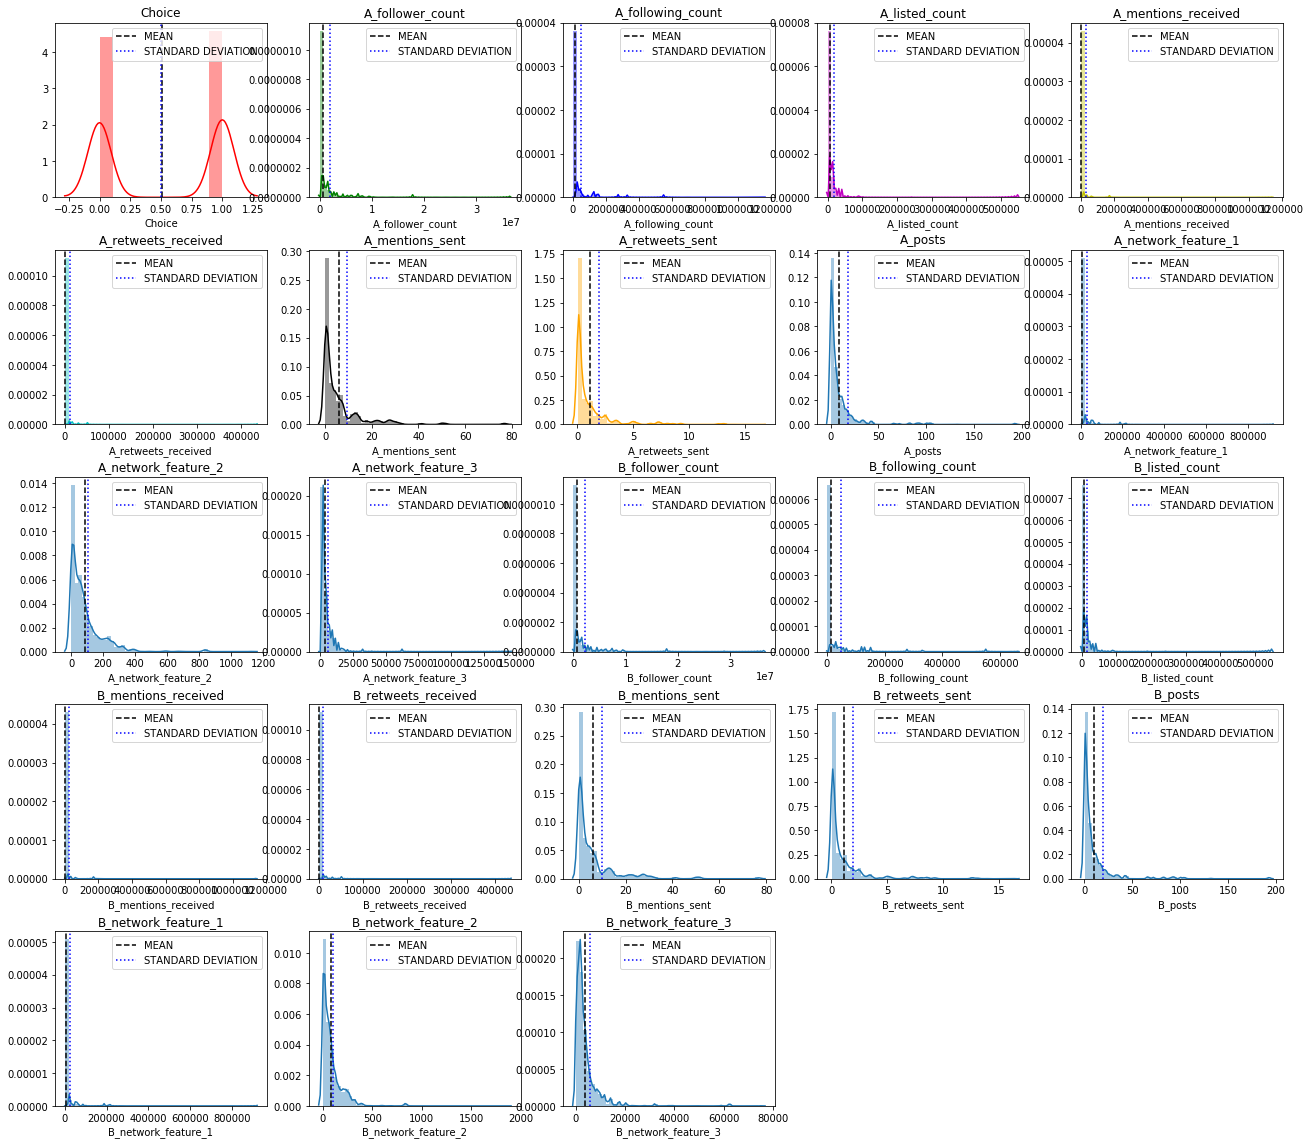

In [10]:
columns = ['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3']
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(22,45))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(data[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(data[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(data[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
     
print ("                      ***************************************")
print ("                       DISTRIBUTION OF VARIABLES IN DATA SET")
print ("                      ***************************************")

#### Scatter plot between variables for target classes

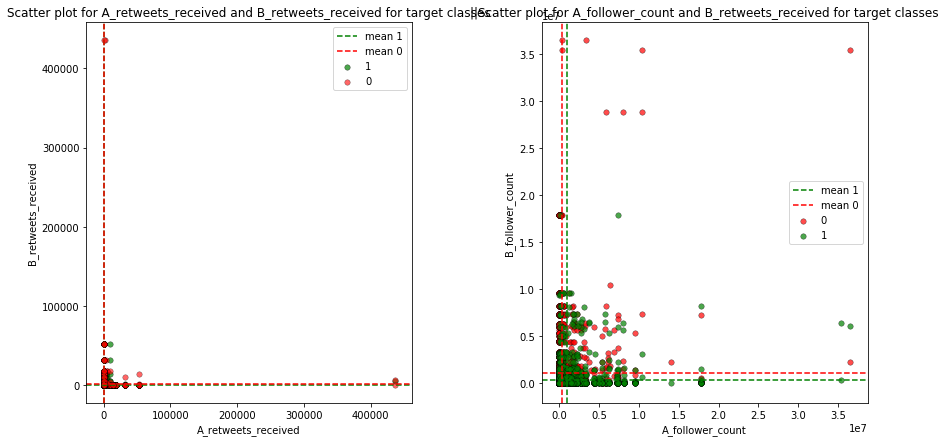

In [11]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.scatter(x = "A_retweets_received",y = "B_retweets_received",data=data[data["Choice"] == 1],alpha=.7,label="1",s=30,color = "g",linewidths=.4,edgecolors="black")
plt.scatter(x = "A_retweets_received",y = "B_retweets_received",data=data[data["Choice"] == 0],alpha=.6,label="0",s=30,color ="r",linewidths=.4,edgecolors="black")
plt.axvline(data[data["Choice"] == 1]["A_retweets_received"].mean(),color = "g",linestyle="dashed",label="mean 1")
plt.axvline(data[data["Choice"] == 0]["A_retweets_received"].mean(),color = "r",linestyle="dashed",label ="mean 0")
plt.axhline(data[data["Choice"] == 1]["B_retweets_received"].mean(),color = "g",linestyle="dashed")
plt.axhline(data[data["Choice"] == 0]["B_retweets_received"].mean(),color = "r",linestyle= "dashed")
plt.legend(loc ="best")
plt.xlabel("A_retweets_received")
plt.ylabel("B_retweets_received")
plt.title("Scatter plot for A_retweets_received and B_retweets_received for target classes")
plt.subplot(122)
plt.scatter(x = "A_follower_count",y = 'B_follower_count',data=data[data["Choice"] == 0],alpha=.7,label="0",s=30,color ="r",linewidths=.4,edgecolors="black")
plt.scatter(x = "A_follower_count",y = 'B_follower_count',data=data[data["Choice"] == 1],alpha=.7,label="1",s=30,color = "g",linewidths=.4,edgecolors="black")
plt.axvline(data[data["Choice"] == 1]["A_follower_count"].mean(),color = "g",linestyle="dashed",label ="mean 1")
plt.axvline(data[data["Choice"] == 0]["A_follower_count"].mean(),color = "r",linestyle="dashed",label ="mean 0")
plt.axhline(data[data["Choice"] == 1]["B_follower_count"].mean(),color = "g",linestyle="dashed")
plt.axhline(data[data["Choice"] == 0]["B_follower_count"].mean(),color = "r",linestyle="dashed")
plt.legend(loc ="best")
plt.xlabel("A_follower_count")
plt.ylabel('B_follower_count')
plt.title("||Scatter plot for A_follower_count and B_retweets_received for target classes")
plt.subplots_adjust(wspace =.4)


3D Analysis for Variables to target class

Text(0.5,0.92,'3D PLOT FOR CHOICE VS A_RETWEETS_RECEIVED VS A_FOLLOWER_COUNT')

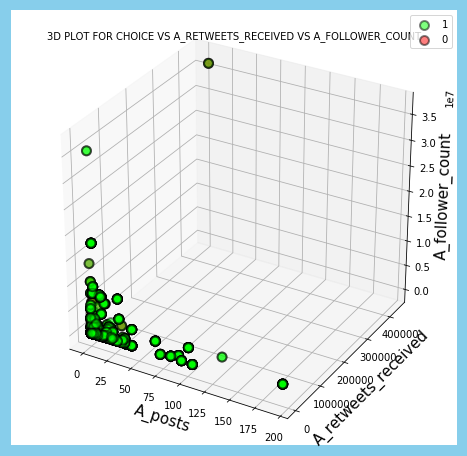

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(111,projection = "3d")

ax.scatter(data[data["Choice"] == 1][["A_posts"]],data[data["Choice"] == 1][["A_retweets_received"]],data[data["Choice"] == 1][["A_follower_count"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="lime",label="1")
ax.scatter(data[data["Choice"] == 0][["A_posts"]],data[data["Choice"] == 0][["A_retweets_received"]],data[data["Choice"] == 0][["A_follower_count"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="r",label="0")

ax.set_xlabel("A_posts",fontsize=15)
ax.set_ylabel("A_retweets_received",fontsize=15)
ax.set_zlabel("A_follower_count",fontsize=15)
plt.legend(loc="best")
fig.set_facecolor("skyblue")
plt.title("3D PLOT FOR CHOICE VS A_RETWEETS_RECEIVED VS A_FOLLOWER_COUNT",fontsize=10)

Text(0.5,0.92,'3D PLOT FOR CHOICE VS B_RETWEETS_RECEIVED VS B_FOLLOWER_COUNT')

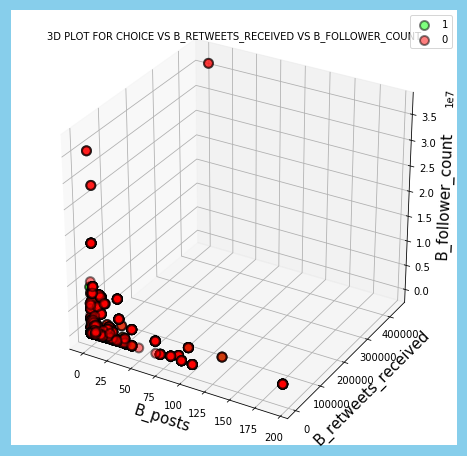

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(111,projection = "3d")

ax.scatter(data[data["Choice"] == 1][["B_posts"]],data[data["Choice"] == 1][["B_retweets_received"]],data[data["Choice"] == 1][["B_follower_count"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="lime",label="1")
ax.scatter(data[data["Choice"] == 0][["B_posts"]],data[data["Choice"] == 0][["B_retweets_received"]],data[data["Choice"] == 0][["B_follower_count"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="r",label="0")

ax.set_xlabel("B_posts",fontsize=15)
ax.set_ylabel("B_retweets_received",fontsize=15)
ax.set_zlabel("B_follower_count",fontsize=15)
plt.legend(loc="best")
fig.set_facecolor("skyblue")
plt.title("3D PLOT FOR CHOICE VS B_RETWEETS_RECEIVED VS B_FOLLOWER_COUNT",fontsize=10)

### Outlier Analysis 

In [48]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
%matplotlib inline


import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

print(__doc__)

rng = np.random.RandomState(42)

# Example settings
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0, 1, 2]

# define two outlier detection tools to be compared
classifiers = {
    "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                     kernel="rbf", gamma=0.1),
    "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
    "Isolation Forest": IsolationForest(max_samples=n_samples,
                                        contamination=outliers_fraction,
                                        random_state=rng),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=35,
        contamination=outliers_fraction)}

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.ones(n_samples, dtype=int)
ground_truth[-n_outliers:] = -1

# Fit the problem with varying cluster separation
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
   # X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
   # X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
   # X = data_1
    # Add outliers
    X = data_1

    # Fit the model
    plt.figure(figsize=(9, 7))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        # fit the data and tag outliers
        if clf_name == "Local Outlier Factor":
            y_pred = clf.fit_predict(X)
            scores_pred = clf.negative_outlier_factor_
        else:
            clf.fit(X)
            scores_pred = clf.decision_function(X)
            y_pred = clf.predict(X)
        threshold = stats.scoreatpercentile(scores_pred,
                                            100 * outliers_fraction)
        n_errors = (y_pred != ground_truth)
        print(X.shape)
        # plot the levels lines and the points
        if clf_name == "Local Outlier Factor":
            # decision_function is private for LOF
            Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(2, 2, i + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        a = subplot.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [a.collections[0], b, c],
            ['learned decision function', 'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection")

plt.show()

Automatically created module for IPython interactive environment
(5500, 23)


ValueError: X.shape[1] = 2 should be equal to 23, the number of features at training time

<Figure size 648x504 with 0 Axes>

Density plot between A_posts and A_retweets_received

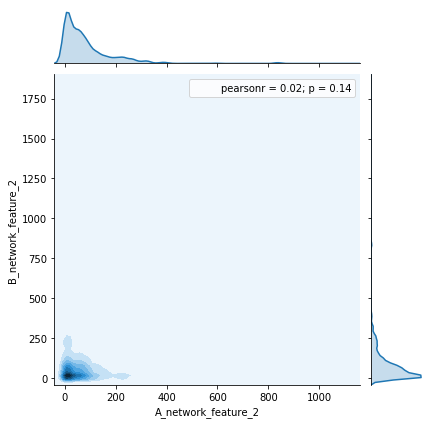

In [14]:
sns.jointplot(data["A_network_feature_2"],data["B_network_feature_2"],kind="kde")

Text(0.5,1,'Bubble plot for B_retweets_sent,B_network_feature_2 and B_following_count')

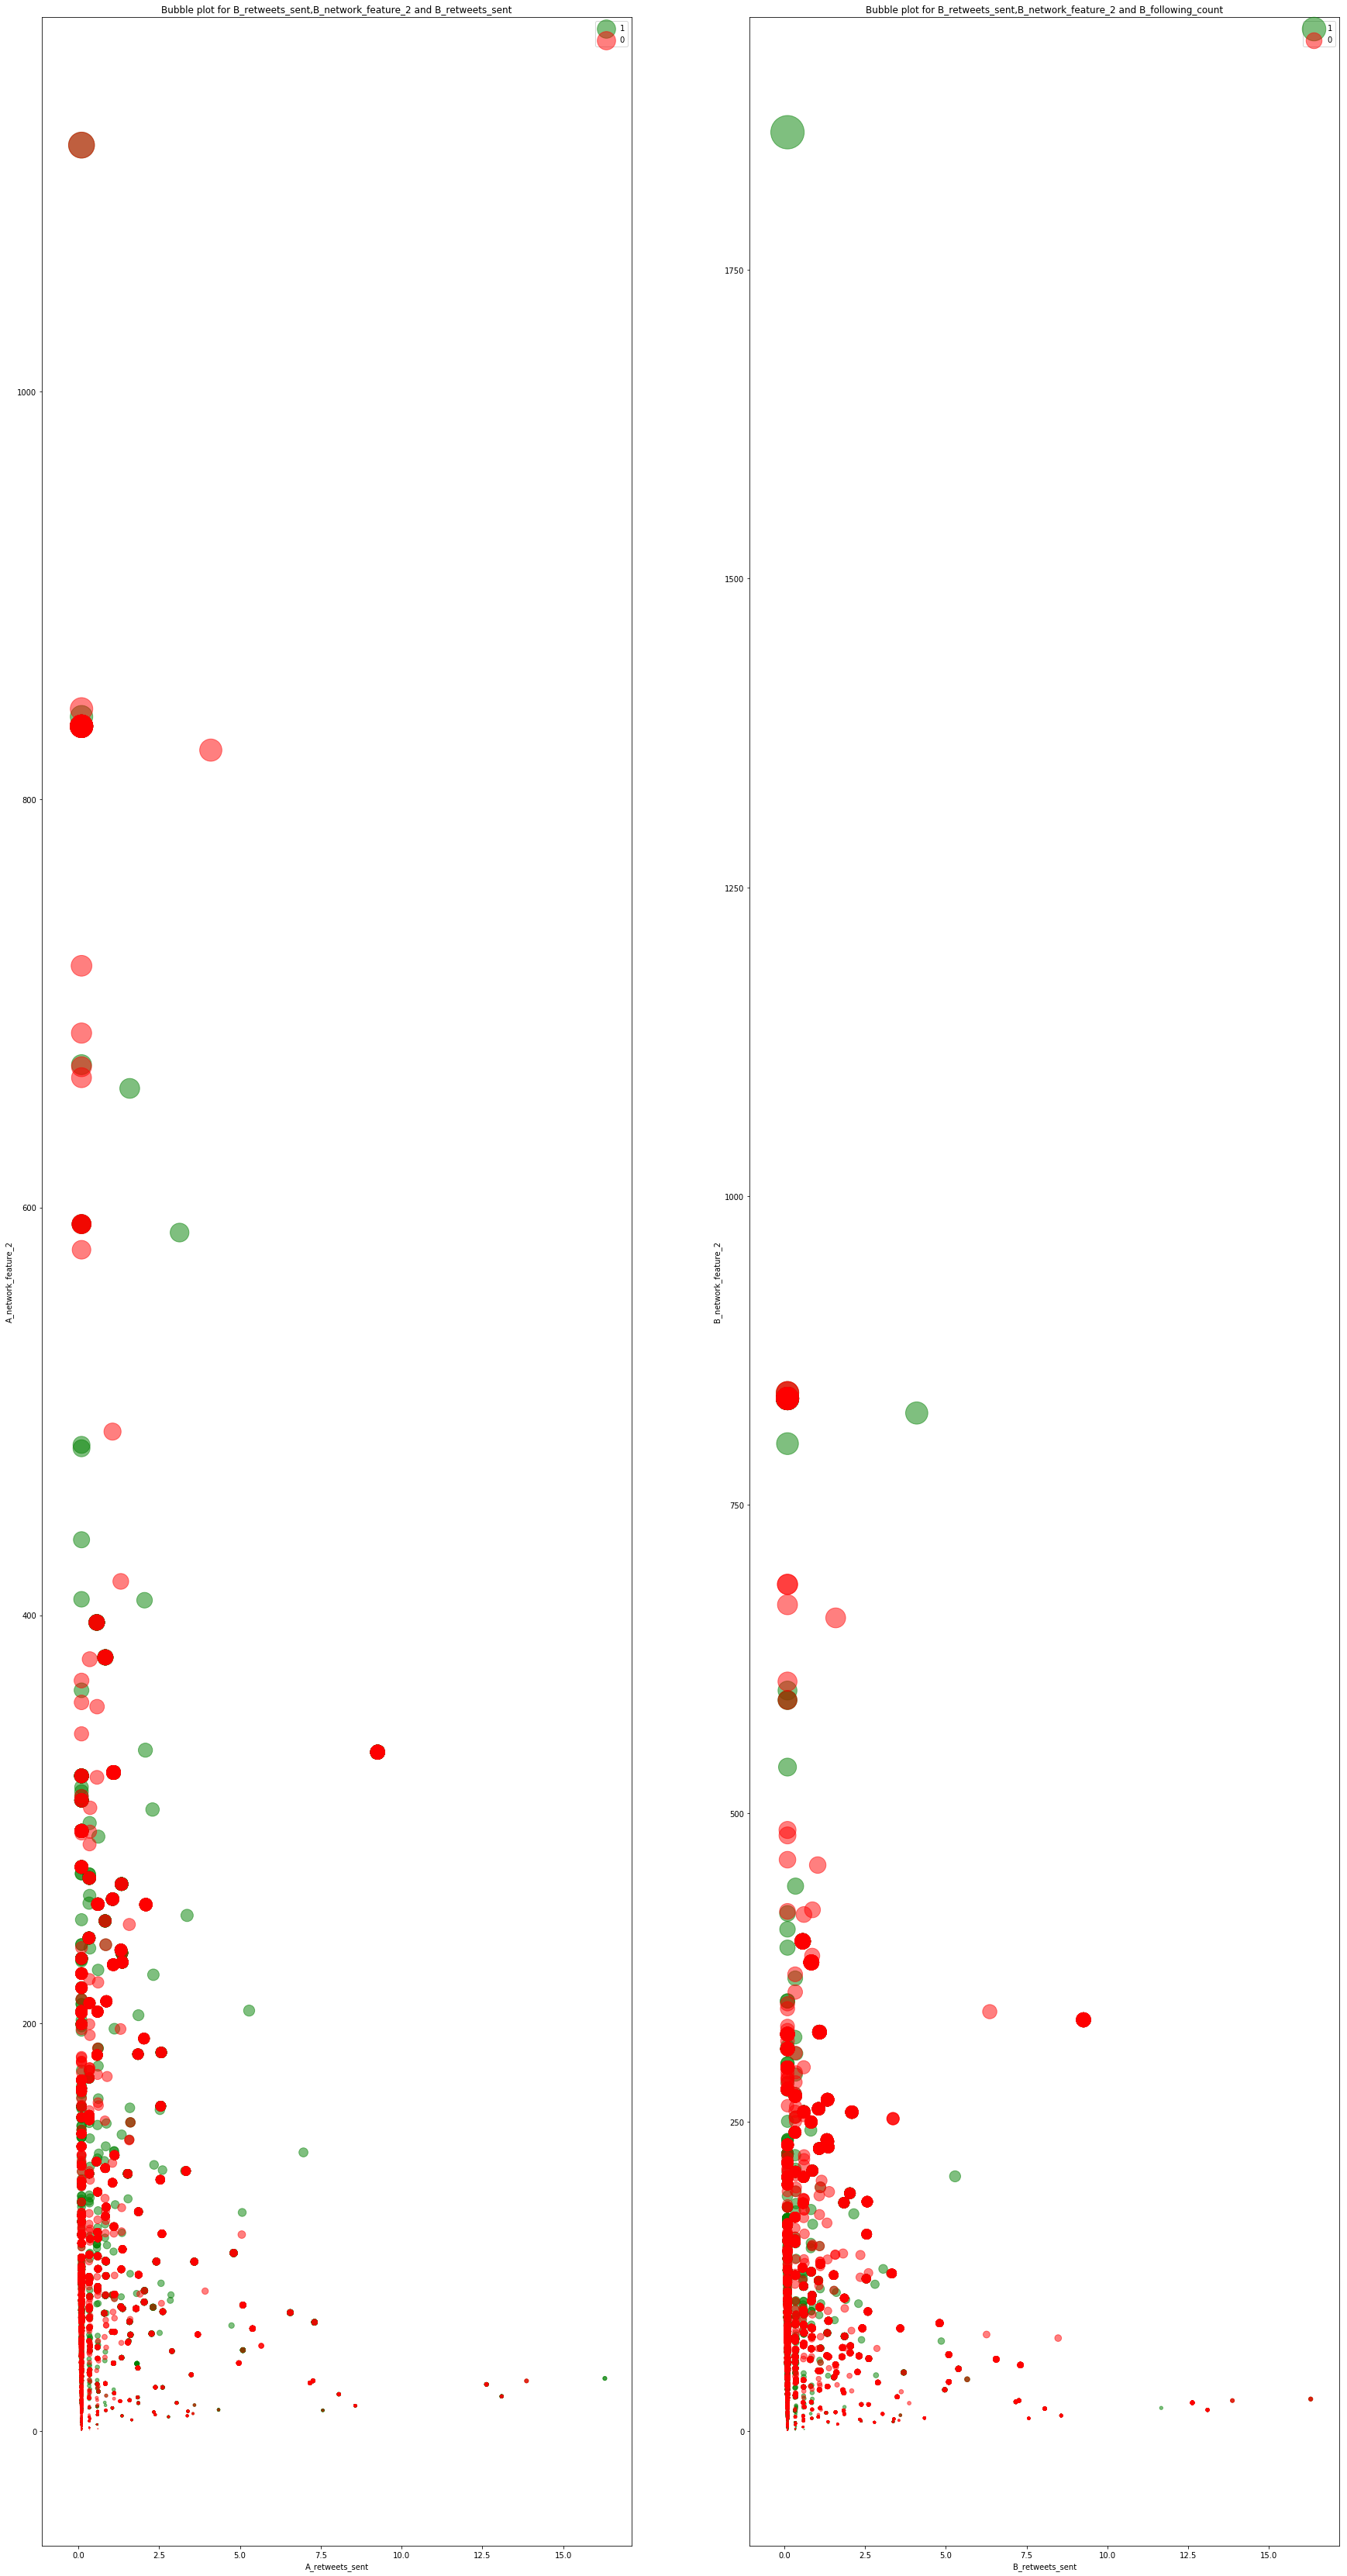

In [15]:
st = data[data["Choice"] == 1].reset_index()
nst= data[data["Choice"] == 0].reset_index()
new = pd.concat([nst,st]).reset_index()
plt.subplot(121)
plt.scatter(st["A_retweets_sent"],st["A_network_feature_2"],alpha=.5,s=st["A_network_feature_2"],linewidths=1,color="g",label="1")
plt.scatter(nst["A_retweets_sent"],nst["A_network_feature_2"],alpha=.5,s=nst["A_network_feature_2"],linewidths=1,color="r",label="0")
plt.legend(loc="best")
plt.xlabel("A_retweets_sent")
plt.ylabel("A_network_feature_2")
plt.title("Bubble plot for B_retweets_sent,B_network_feature_2 and B_retweets_sent")


plt.subplot(122)
plt.scatter(st["B_retweets_sent"],st["B_network_feature_2"],alpha=.5,s=st["B_network_feature_2"],linewidths=1,color="g",label="1")
plt.scatter(nst["B_retweets_sent"],nst["B_network_feature_2"],alpha=.5,s=nst["B_network_feature_2"],linewidths=1,color="r",label="0")
plt.legend(loc="best")
plt.xlabel("B_retweets_sent")
plt.ylabel("B_network_feature_2")
plt.title("Bubble plot for B_retweets_sent,B_network_feature_2 and B_following_count")

### Visualizing the distribution of the variables for the target class

<Figure size 57600x2880 with 0 Axes>

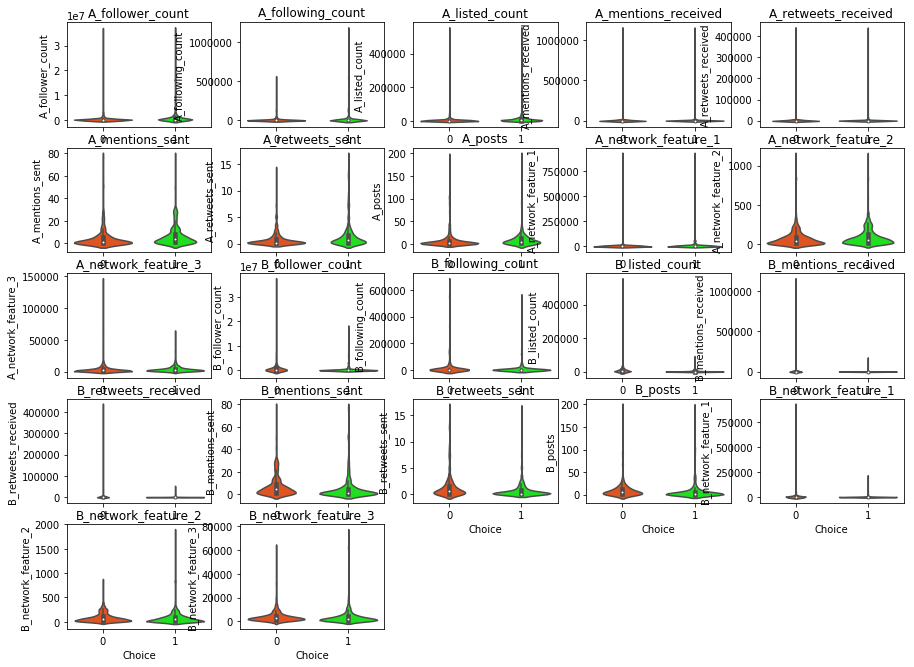

<Figure size 57600x2880 with 0 Axes>

In [16]:

columns = [x for x in data.columns if x not in ["Choice"]]
length  = len(columns)

plt.figure(figsize=(15,25))

for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(length/2,length/4,j+1)
    sns.violinplot(x=data["Choice"],y=data[i],palette=["Orangered","lime"],alpha=.5)
    plt.title(i)

plt.figure(figsize=(800,40))

<h1> <center> Pre-processing Data </h1> </center> 

The dataset has :  5500  entries.


Text(0,0.5,'')

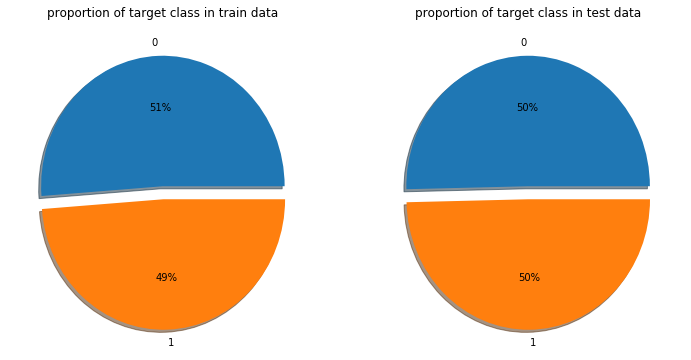

In [20]:
# Split the original data into train and test. 

from sklearn import model_selection 

dataSize = data.shape[0]
print("The dataset has : ",dataSize," entries.")

percentage = 0.30 

xTrain,xTest,yTrain,yTest = model_selection.train_test_split(data.iloc[:,1:],data.iloc[:,0],test_size=percentage,random_state=22)

plt.figure(figsize=(12,6))
plt.subplot(121)
yTrain.value_counts().plot.pie(labels = ["0","1"],autopct = "%1.0f%%",shadow = True,explode=[0,.1])
plt.title("proportion of target class in train data")
plt.ylabel("")
plt.subplot(122)
yTest.value_counts().plot.pie(labels = ["0","1"],autopct = "%1.0f%%",shadow = True,explode=[0,.1])
plt.title("proportion of target class in test data")
plt.ylabel("")


In [21]:
#   Perform a forward-backward feature selection based on p-value

from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

X = xTrain
y = yTrain


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  B_listed_count                 with p-value 4.06978e-33
Add  A_listed_count                 with p-value 4.47078e-31
Add  A_mentions_received            with p-value 7.7054e-16
Add  B_retweets_sent                with p-value 1.639e-16
Add  A_mentions_sent                with p-value 3.69445e-14
Add  A_network_feature_1            with p-value 4.90116e-12
Add  A_network_feature_3            with p-value 1.38601e-12
Add  B_network_feature_3            with p-value 2.86458e-08
Add  B_retweets_received            with p-value 4.27184e-05
Add  B_network_feature_1            with p-value 1.39233e-10
Add  B_follower_count               with p-value 1.66872e-07
Add  A_follower_count               with p-value 0.000148333
Add  B_mentions_sent                with p-value 0.000134803
Add  A_retweets_sent                with p-value 0.00842339
resulting features:
['B_listed_count', 'A_listed_count', 'A_mentions_received', 'B_retweets_sent', 'A_mentions_sent', 'A_network_feature_1', 'A_networ

| The 5 most important variables are: |
|------|
| B_listed_count |
| A_listed_count |
| A_mentions_received |
| B_retweets_sent |
| A_mentions_sent |

As you can see the database is now perfect for statistical learning. The original database was ideal for work.

<h1> <center> Predictive Models </h1> </center> 

### Base Models Function 

First of all we build a model function to run algorithms and extract the AUC score, accuracy, confusion matrix, F1-score and ROC curve. 

In [26]:
# MODEL FUNCTION

# Import libraries.
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import cross_val_score


# Function definition. 
def model(algorithm,dtrain_x,dtrain_y,dtest_x,dtest_y,of_type):
    
    xTrain,xTest,yTrain,yTest = model_selection.train_test_split(data.iloc[:,1:],data.iloc[:,0],test_size=percentage,random_state=22)
    
    print ("*****************************************************************************************")
    print ("                           MODEL - OUTPUT")
    print ("*****************************************************************************************")
    
    # Training the algorithm.
    
    algorithm.fit(dtrain_x,dtrain_y)
    predictions = algorithm.predict(dtest_x)
    
    print (algorithm)
    print ("\n Accuracy Score :",accuracy_score(dtest_y,predictions))
    
    print ("\n Classification Report : \n \n",(classification_report(dtest_y,predictions)))
    
    ################# Results graph ######################## 
    
    # Confusion matrix. 
    
    plt.figure(figsize=(14,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,predictions),annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("Confusion Matrix",fontsize=18,fontweight="bold")
    
    
    # ROC Curve. 
    
    predicting_probabilites = algorithm.predict_proba(dtest_x)[:,1]
    fpr,tpr,thresholds = roc_curve(dtest_y,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",round(auc(fpr,tpr),3)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - Curve & Area Under Curve",fontsize=18,fontweight="bold")
    
    # Coefficients importance graph (Optional)
    
    if  of_type == "feat":
        
        dataframe = pd.DataFrame(algorithm.feature_importances_,dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(224)
        
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("Feature Importance",fontsize=18,fontweight="bold")
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.002,i+0.45,round(j,3),weight = "bold")
    
    elif of_type == "coef" :
        
        dataframe = pd.DataFrame(algorithm.coef_.ravel(),dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(224)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("Feature Importance",fontsize=18,fontweight="bold")
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(max(dataframe["coefficients"])/20,i+0.45,round(j,3),weight = "bold")
            
    elif of_type == "none" :
        plt.subplot(224)
    
    ######## Cross Validation Analysis. ##################### 
    
    # Merge X_train and X_test.
    xTotal= np.concatenate((dtrain_x,dtest_x),axis=0)
    
    # Merge y_train and y_test. 
    yTotal= np.concatenate((dtrain_y,dtest_y),axis=0)
    
    k=10  # Scoring with Accuracy.
    scoresAccuracy=cross_val_score(rfc,xTotal,yTotal,cv=k)
    #print("Accuracy: %0.3f (+/- %0.3f)" % (scoresAccuracy.mean(), scoresAccuracy.std() * 2))
    
    k=10  # Scoring with AUC.
    scoresAUC=cross_val_score(rfc,xTotal,yTotal,cv=k,scoring='roc_auc')
    #print("Accuracy: %0.3f (+/- %0.3f)" % (scoresAUC.mean(), scoresAUC.std() * 2))
    
    plt.subplot(223)
    plt.title("Cross Validation Results",fontsize=18,fontweight="bold")
    lastPlot = plt.subplot(223)

    circle1 = plt.Circle((1, 2), 1, color='grey', alpha =0.7)
    circle2 = plt.Circle((4, 2), 1, color='#000033' , alpha=0.3)
    
    lastPlot.set_xlim((0,7))
    lastPlot.set_ylim((0,4))
    
    lastPlot.add_artist(circle1)
    lastPlot.add_artist(circle2)
    
    lastPlot.text(1,2.25,"AUC",weight = "bold",fontsize=16,ha='center')
    lastPlot.text(4,2.25,"Accuracy",weight = "bold",fontsize=16,ha='center')
    
    lastPlot.text(1,1.65,"%0.3f \n (+/- %0.3f)" % (scoresAUC.mean(), scoresAUC.std() * 2),fontsize=14 ,ha='center')
    lastPlot.text(4,1.65,"%0.3f \n (+/- %0.3f)" % (scoresAccuracy.mean(), scoresAccuracy.std() * 2),fontsize=14,ha='center')
    
    lastPlot.axis('off')
    
    lastPlot.plot()
    
    ################## Validation over real test set ####################### 
    
    # Importing validation(test) set.
    
    validation = pd.read_csv("https://github.com/jesugome/InfluencersInSocialNetworks/raw/master/datasets/test.csv",sep=",")
    
    
    predicting_probabilites = algorithm.predict_proba(validation)
    
    fileName=str(algorithm)[:7]+'_predictions.csv'
    printFile= open(fileName,'w+')
    
    #printFile.write('Id,Choice'+'\n')
    
    predPrint=pd.DataFrame(predicting_probabilites[:,0])
    
    predPrint.index=np.arange(1,len(predPrint)+1)
    
    predPrint.to_csv(fileName,index=True,header=['Choice'],index_label='id')
    
    printFile.close()
    
    
    

### Random Forest Classifier

First of all we build a model function to run algorithms and extract the AUC score, accuracy, confusion matrix, F1-score and ROC curve. 

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=16,
            oob_score=False, random_state=27, verbose=0, warm_start=False)

 Accuracy Score : 0.7733333333333333

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.79      0.74      0.76       819
          1       0.76      0.81      0.78       831

avg / total       0.77      0.77      0.77      1650



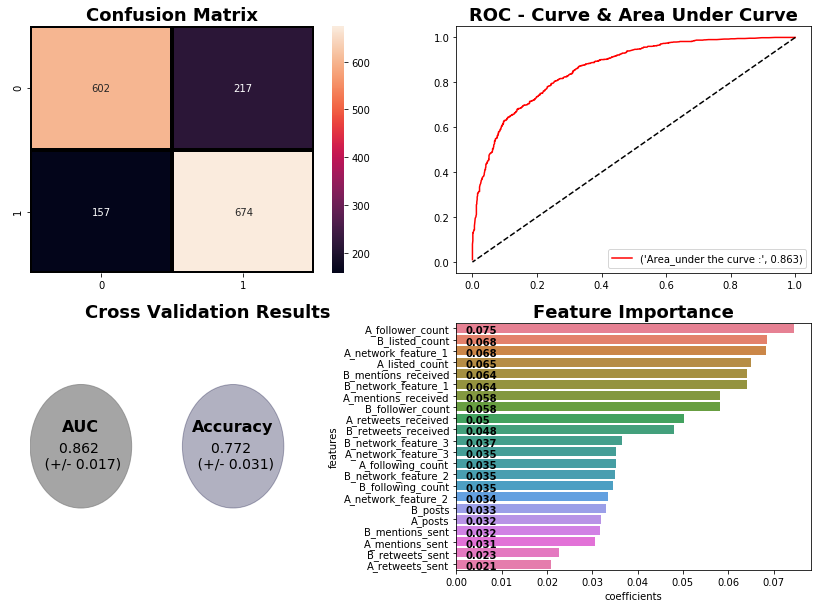

In [32]:
# Random Forest Classifier. 

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=16,n_estimators=300, random_state=27, criterion='entropy')

# Call model function to train algorithm.

model(rfc,xTrain,yTrain,xTest,yTest,"feat")

### Logistic Regression

First of all we build a model function to run algorithms and extract the AUC score, accuracy, confusion matrix, F1-score and ROC curve. 

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=27,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Accuracy Score : 0.7363636363636363

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.74      0.73      0.73       819
          1       0.74      0.74      0.74       831

avg / total       0.74      0.74      0.74      1650



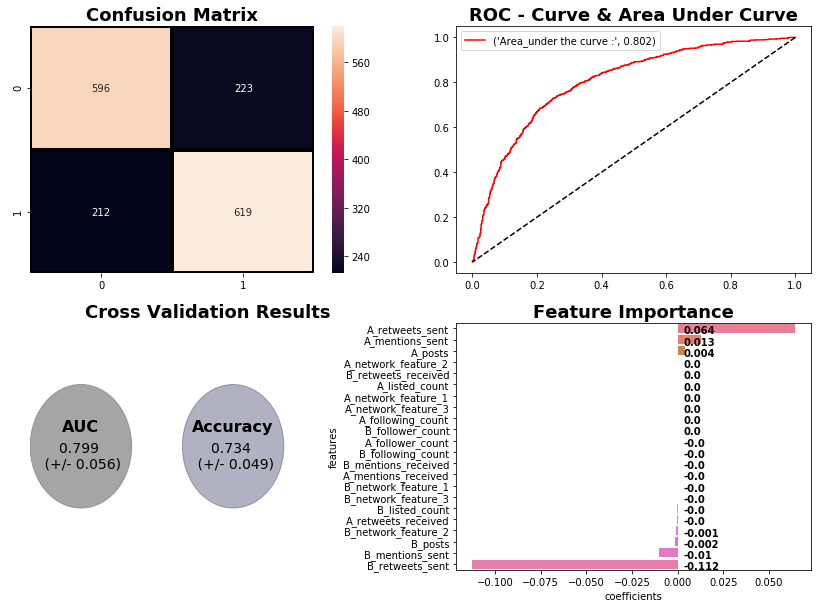

In [35]:
# Logistic Classifier. 
from sklearn.linear_model import LogisticRegression

rfc = LogisticRegression(penalty='l1',class_weight='balanced', random_state=27)

# Call model function to train algorithm.

model(rfc,xTrain,yTrain,xTest,yTest,"coef")

### k-nearest Neighbors

First of all we build a model function to run algorithms and extract the AUC score, accuracy, confusion matrix, F1-score and ROC curve. 

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

 Accuracy Score : 0.7387878787878788

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.75      0.71      0.73       819
          1       0.73      0.76      0.75       831

avg / total       0.74      0.74      0.74      1650



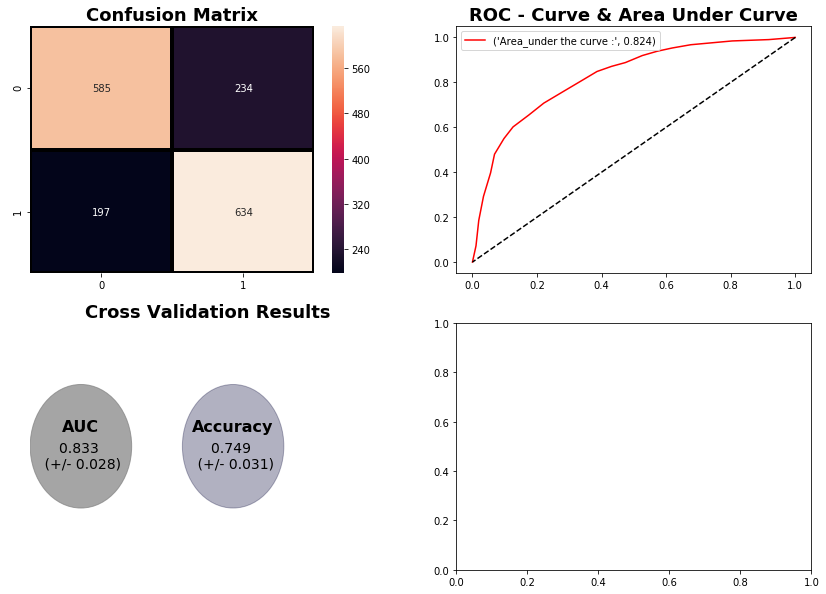

In [42]:
# K-nearest neighbors Classifier. 

from sklearn.neighbors import KNeighborsClassifier

# Parameter is the number of neighbors. 

rfc = KNeighborsClassifier(20)

# Call model function to train algorithm.

model(rfc,xTrain,yTrain,xTest,yTest,"none")

### Decision Tree Classifier

First of all we build a model function to run algorithms and extract the AUC score, accuracy, confusion matrix, F1-score and ROC curve. 

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=27,
            splitter='best')

 Accuracy Score : 0.7460606060606061

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.78      0.68      0.73       819
          1       0.72      0.81      0.76       831

avg / total       0.75      0.75      0.75      1650



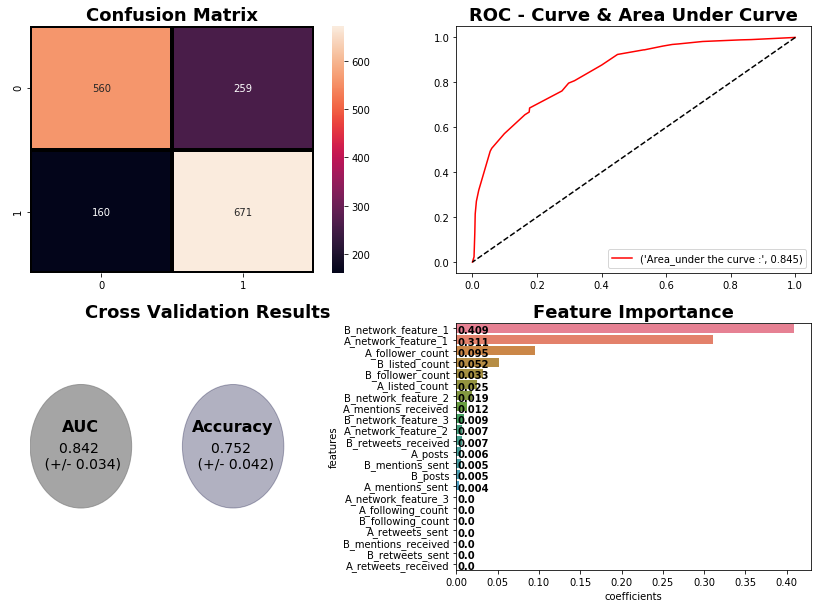

In [55]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

rfc = DecisionTreeClassifier(max_depth=5,criterion='entropy',random_state=27)

# Call model function to train algorithm.

model(rfc,xTrain,yTrain,xTest,yTest,"feat")

### AdaBoost classifier

First of all we build a model function to run algorithms and extract the AUC score, accuracy, confusion matrix, F1-score and ROC curve. 

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=27)

 Accuracy Score : 0.7739393939393939

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.78      0.76      0.77       819
          1       0.77      0.79      0.78       831

avg / total       0.77      0.77      0.77      1650



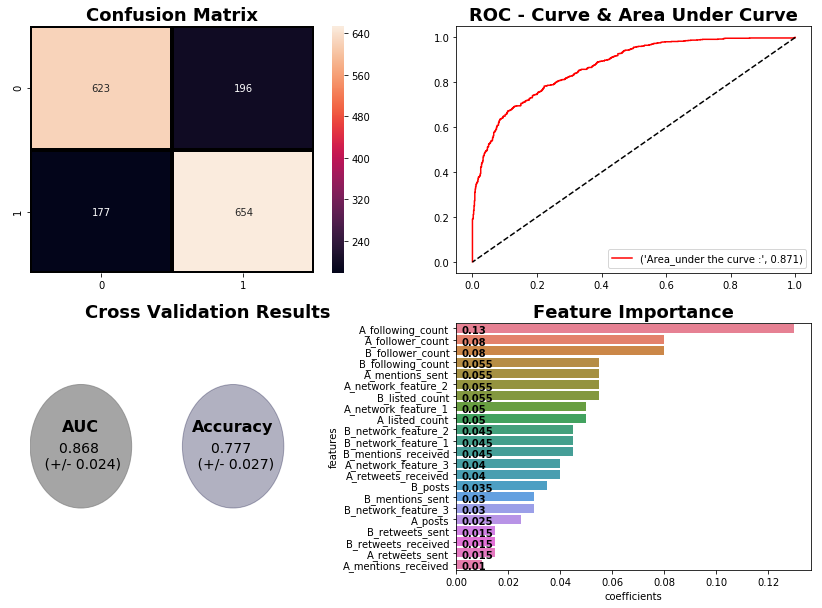

In [58]:
# AdaBoost classifier.

from sklearn.ensemble import AdaBoostClassifier

rfc = AdaBoostClassifier(n_estimators=200, learning_rate= 1.0,random_state=27)

# Call model function to train algorithm.

model(rfc,xTrain,yTrain,xTest,yTest,"feat")

### Naive Bayes Classificator

First of all we build a model function to run algorithms and extract the AUC score, accuracy, confusion matrix, F1-score and ROC curve. 

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
GaussianNB(priors=None)

 Accuracy Score : 0.5448484848484848

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.70      0.15      0.24       819
          1       0.53      0.94      0.67       831

avg / total       0.61      0.54      0.46      1650



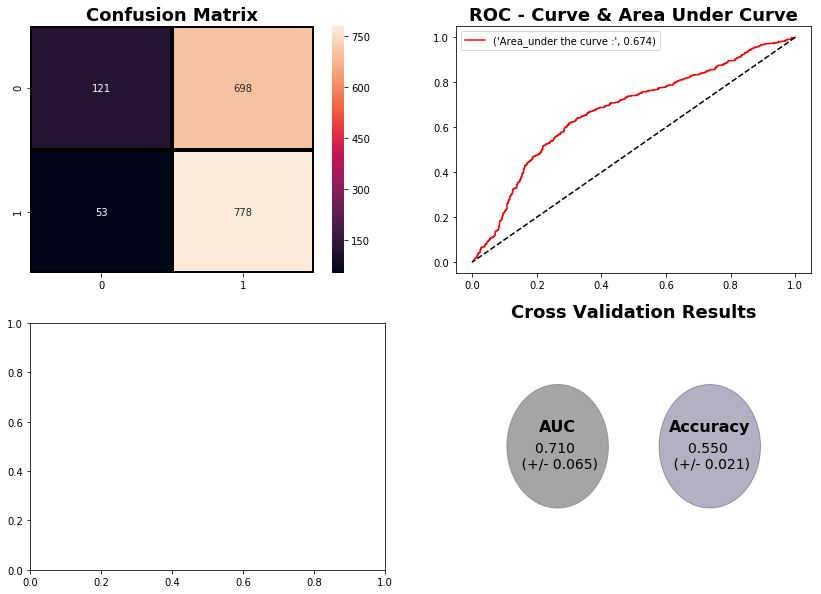

In [25]:
# Naive Bayes Classifier. 

from sklearn.naive_bayes import GaussianNB

# Parameter is the number of neighbors. 

rfc = GaussianNB()

# Call model function to train algorithm.

model(rfc,xTrain,yTrain,xTest,yTest,"none")

### Quadratic Discriminant Analysis

First of all we build a model function to run algorithms and extract the AUC score, accuracy, confusion matrix, F1-score and ROC curve. 

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

 Accuracy Score : 0.5806060606060606

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.73      0.24      0.37       819
          1       0.55      0.91      0.69       831

avg / total       0.64      0.58      0.53      1650



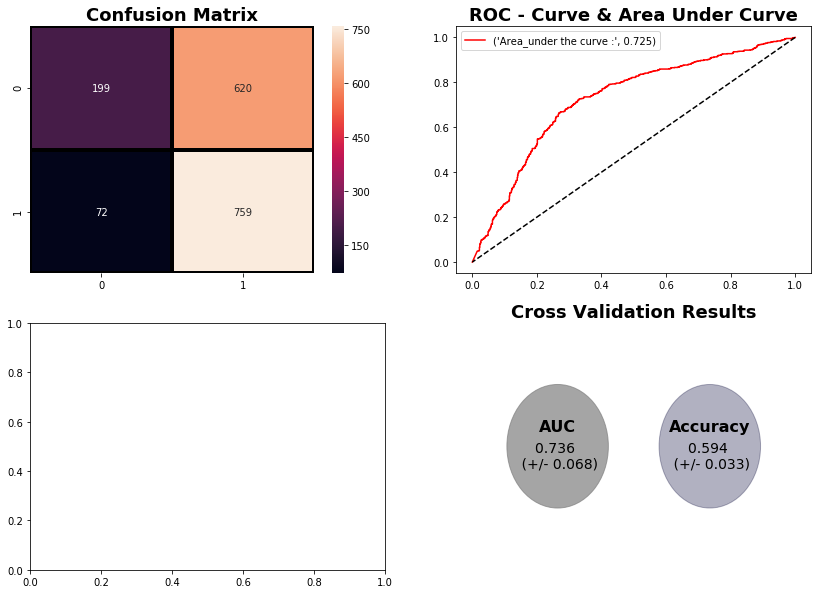

In [26]:
# Quadratic Discriminant Analysis Classifier.

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

rfc = QuadraticDiscriminantAnalysis()

# Call model function to train algorithm.

model(rfc,xTrain,yTrain,xTest,yTest,"none")

### Gradient Boosting Classifier.

First of all we build a model function to run algorithms and extract the AUC score, accuracy, confusion matrix, F1-score and ROC curve. 

In [ ]:
# Gradient Boosting Classifier.
from sklearn.ensemble import GradientBoostingClassifier

rfc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=10000, subsample=1.0, 
                                 min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, 
                                 random_state=27, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False)

# Call model function to train algorithm.

model(rfc,xTrain,yTrain,xTest,yTest,"feat")

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10000,
              presort='auto', random_state=27, subsample=1.0, verbose=0,
              warm_start=False)

 Accuracy Score : 0.776969696969697

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.79      0.74      0.77       819
          1       0.76      0.81      0.79       831

avg / total       0.78      0.78      0.78      1650



<h1> <center> Ensemble methods </h1> </center> 

The assembly methods had a lower performance than the classification algorithms evaluated separately.

In [59]:
# Ensemble
from sklearn.ensemble import VotingClassifier

rf = RandomForestClassifier(n_jobs=2,n_estimators=100, random_state=27)
lr = LogisticRegression()
kn = KNeighborsClassifier(30)
dt = DecisionTreeClassifier(max_depth=5)
ab = AdaBoostClassifier()
gn = GaussianNB()
qd = QuadraticDiscriminantAnalysis()

eclf1 = VotingClassifier(estimators=[('rfc',rf),('lrf',lr),('knc',kn),('dtc',dt),('abc',ab),('gnb',gn),('qda',qd)],
                         voting ='soft')

model(eclf1,xTrain,yTrain,xTest,yTest,"none")

NameError: name 'GaussianNB' is not defined

In [ ]:
from mlxtend.classifier import StackingClassifier

sclf = StackingClassifier(classifiers=[rf,lr,kn,dt,gn,qd], meta_classifier=ab)

model(sclf,xTrain,yTrain,xTest,yTest,"none")

<h2><center>
Final Remarks
</center></h2>

## Escribir algunas conclusiones que consideren pertienentes. (Luego entre todos revisamos cuales se quedan)